<a href="https://colab.research.google.com/github/isil-slck/Neo_bank_project/blob/main/ISIL_of_Neo_bank_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Load and Exploration

In [ ]:
!pip install pycaret

In [ ]:
import pandas as pd

In [ ]:
from google.colab import auth
import pandas as pd
# Will collect your credentials
auth.authenticate_user()
# Query Bigquery
query = "SELECT * FROM `data-analytics-bootcamp-363212.neo_bank.devices`"
project = "data-analytics-bootcamp-363212"
df_devices = pd.read_gbq(query=query, project_id=project)

In [ ]:
df_devices.head()

,string_field_0,string_field_1
0,Apple,user_6809
1,Apple,user_3636
2,Apple,user_510
3,Apple,user_3468
4,Apple,user_7036


In [ ]:
df_devices.describe()

,string_field_0,string_field_1
count,19431,19431
unique,4,19431
top,Android,user_6809
freq,9714,1


In [ ]:
df_devices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19431 entries, 0 to 19430
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   string_field_0  19431 non-null  object
 1   string_field_1  19431 non-null  object
dtypes: object(2)
memory usage: 303.7+ KB


In [ ]:
df_devices.columns = ['brand','user_id']

df_devices

,brand,user_id
0,Apple,user_6809
1,Apple,user_3636
2,Apple,user_510
3,Apple,user_3468
4,Apple,user_7036
...,...,...
19426,Unknown,user_13531
19427,Unknown,user_12568
19428,Unknown,user_12296
19429,Unknown,user_19056


In [ ]:
df_devices['user_id'].is_unique

True

In [ ]:
df_devices['brand'].value_counts(normalize=True)

,proportion
brand,
Android,0.499923
Apple,0.497813
Unknown,0.002213
brand,0.000051


In [ ]:
query = "SELECT * FROM `data-analytics-bootcamp-363212.neo_bank.notifications`"
df_notifications = pd.read_gbq(query=query, project_id=project)

In [ ]:
df_notifications.head()

,reason,channel,status,user_id,created_date
0,METAL_RESERVE_PLAN,SMS,SENT,user_4703,2018-10-14 01:48:13.319987+00:00
1,METAL_RESERVE_PLAN,SMS,SENT,user_2397,2018-10-17 08:07:05.709072+00:00
2,METAL_RESERVE_PLAN,SMS,SENT,user_2411,2018-10-14 03:46:34.244392+00:00
3,METAL_RESERVE_PLAN,SMS,SENT,user_1119,2018-10-14 14:16:35.801185+00:00
4,METAL_RESERVE_PLAN,SMS,SENT,user_3499,2018-10-14 18:41:09.268675+00:00


In [ ]:
df_notifications.describe()

,reason,channel,status,user_id,created_date
count,121813,121813,121813,121813,121813
unique,17,3,2,18953,NaN
top,REENGAGEMENT_ACTIVE_FUNDS,EMAIL,SENT,user_5133,NaN
freq,35844,61253,89477,289,NaN
mean,NaN,NaN,NaN,NaN,2018-11-27 00:03:38.375218+00:00
min,NaN,NaN,NaN,NaN,2018-01-10 12:09:55.050139+00:00
25%,NaN,NaN,NaN,NaN,2018-10-09 19:48:43.056855+00:00
50%,NaN,NaN,NaN,NaN,2018-12-27 08:11:10.079682+00:00
75%,NaN,NaN,NaN,NaN,2019-02-10 08:06:23.441000+00:00
max,NaN,NaN,NaN,NaN,2019-05-12 17:12:14.132130+00:00


In [ ]:
df_notifications.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121813 entries, 0 to 121812
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype              
---  ------        --------------   -----              
 0   reason        121813 non-null  object             
 1   channel       121813 non-null  object             
 2   status        121813 non-null  object             
 3   user_id       121813 non-null  object             
 4   created_date  121813 non-null  datetime64[us, UTC]
dtypes: datetime64[us, UTC](1), object(4)
memory usage: 4.6+ MB


In [ ]:
# crate_date turn into date_date(data type)

In [ ]:
df_notifications['reason'].unique()

array(['METAL_RESERVE_PLAN', 'REENGAGEMENT_ACTIVE_FUNDS', 'BLACK_FRIDAY',
       'LOST_CARD_ORDER', 'FIFTH_PAYMENT_PROMO', 'JOINING_ANNIVERSARY',
       'PUMPKIN_PAYMENT_NOTIFICATION', 'PREMIUM_ENGAGEMENT_FEES_SAVED',
       'PREMIUM_ENGAGEMENT_INACTIVE_CARD', 'WELCOME_HOME',
       'METAL_GAME_START', 'NO_INITIAL_CARD_USE', 'NO_INITIAL_CARD_ORDER',
       'ONBOARDING_TIPS_ACTIVATED_USERS',
       'ENGAGEMENT_SPLIT_BILL_RESTAURANT',
       'MADE_MONEY_REQUEST_NOT_SPLIT_BILL',
       'NO_INITIAL_FREE_PROMOPAGE_CARD_ORDER'], dtype=object)

In [ ]:
df_notifications['status'].unique()

array(['SENT', 'FAILED'], dtype=object)

In [ ]:
df_notifications['channel'].unique()

array(['SMS', 'PUSH', 'EMAIL'], dtype=object)

In [ ]:
df_notifications['channel'].value_counts(normalize=True)

,proportion
channel,
EMAIL,0.502845
PUSH,0.473537
SMS,0.023618


In [ ]:
query = "SELECT * FROM `data-analytics-bootcamp-363212.neo_bank.transactions`"
df_transactions = pd.read_gbq(query=query, project_id=project)

In [ ]:
df_transactions.head()

,transaction_id,transactions_type,transactions_currency,amount_usd,transactions_state,ea_cardholderpresence,ea_merchant_mcc,ea_merchant_city,ea_merchant_country,direction,user_id,created_date
0,transaction_1973,TOPUP,AED,6079.39,COMPLETED,None,NaN,None,None,INBOUND,user_4773,2018-08-13 21:51:28.670363+00:00
1,transaction_508,TOPUP,AED,298.64,COMPLETED,None,NaN,None,None,INBOUND,user_4773,2018-09-06 18:19:53.401363+00:00
2,transaction_33,TOPUP,AED,236.63,COMPLETED,None,NaN,None,None,INBOUND,user_4773,2018-10-04 09:28:24.287363+00:00
3,transaction_1755306,EXCHANGE,AED,69.92,COMPLETED,None,NaN,None,None,OUTBOUND,user_10943,2018-12-07 19:45:41.208245+00:00
4,transaction_940,EXCHANGE,AED,52.24,COMPLETED,None,NaN,None,None,OUTBOUND,user_1363,2018-12-28 01:29:52.746895+00:00


In [ ]:
df_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2740075 entries, 0 to 2740074
Data columns (total 12 columns):
 #   Column                 Dtype              
---  ------                 -----              
 0   transaction_id         object             
 1   transactions_type      object             
 2   transactions_currency  object             
 3   amount_usd             float64            
 4   transactions_state     object             
 5   ea_cardholderpresence  object             
 6   ea_merchant_mcc        float64            
 7   ea_merchant_city       object             
 8   ea_merchant_country    object             
 9   direction              object             
 10  user_id                object             
 11  created_date           datetime64[us, UTC]
dtypes: datetime64[us, UTC](1), float64(2), object(9)
memory usage: 250.9+ MB


In [ ]:
df_transactions['transactions_state'].value_counts(normalize=True)

,proportion
transactions_state,
COMPLETED,0.878796
DECLINED,0.056672
REVERTED,0.041100
FAILED,0.014982
PENDING,0.007844
CANCELLED,0.000605


In [ ]:
df_transactions['transaction_id'].is_unique

True

In [ ]:
df_transactions['user_id'].is_unique

False

In [ ]:
df_transactions['user_id'].nunique()

18766

In [ ]:
df_transactions['transactions_type'].value_counts(normalize=True)

,proportion
transactions_type,
CARD_PAYMENT,0.538591
TRANSFER,0.182626
TOPUP,0.141723
EXCHANGE,0.058082
ATM,0.034187
CASHBACK,0.030214
FEE,0.008634
CARD_REFUND,0.004366
TAX,0.001032


In [ ]:
df_transactions['transactions_currency'].value_counts(normalize=True)

,proportion
transactions_currency,
EUR,0.423395
GBP,0.324004
PLN,0.084517
RON,0.061241
USD,0.029429
CZK,0.016412
CHF,0.014494
SEK,0.009782
AUD,0.006157


In [ ]:
df_transactions['direction'].unique()

array(['INBOUND', 'OUTBOUND'], dtype=object)

In [ ]:
query = "SELECT * FROM `data-analytics-bootcamp-363212.neo_bank.users`"
df_users = pd.read_gbq(query=query, project_id=project)

In [ ]:
df_users.head()

,user_id,birth_year,country,city,created_date,user_settings_crypto_unlocked,plan,attributes_notifications_marketing_push,attributes_notifications_marketing_email,num_contacts,num_referrals,num_successful_referrals
0,user_2811,1988,IE,C,2018-03-04 21:46:39.616834+00:00,0,STANDARD,NaN,NaN,0,0,0
1,user_4750,1987,FR,Ry,2018-04-07 06:49:18.345736+00:00,0,STANDARD,NaN,NaN,0,0,0
2,user_17686,1984,GB,Ayr,2018-12-04 10:28:02.653147+00:00,0,PREMIUM,NaN,NaN,6,0,0
3,user_18779,1965,GB,Ayr,2018-12-31 07:42:19.353613+00:00,0,STANDARD,NaN,NaN,0,0,0
4,user_7823,1999,PL,Buk,2018-06-07 03:22:40.590209+00:00,0,STANDARD,NaN,NaN,0,0,0


In [ ]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19430 entries, 0 to 19429
Data columns (total 12 columns):
 #   Column                                    Non-Null Count  Dtype              
---  ------                                    --------------  -----              
 0   user_id                                   19430 non-null  object             
 1   birth_year                                19430 non-null  Int64              
 2   country                                   19430 non-null  object             
 3   city                                      19430 non-null  object             
 4   created_date                              19430 non-null  datetime64[us, UTC]
 5   user_settings_crypto_unlocked             19430 non-null  Int64              
 6   plan                                      19430 non-null  object             
 7   attributes_notifications_marketing_push   12820 non-null  float64            
 8   attributes_notifications_marketing_email  12820 non-null

In [ ]:
df_users['user_id'].is_unique

True

In [ ]:
df_users['plan'].value_counts(normalize=True)

,proportion
plan,
STANDARD,0.925991
PREMIUM,0.044519
METAL,0.026094
METAL_FREE,0.001904
PREMIUM_OFFER,0.001287
PREMIUM_FREE,0.000206


In [ ]:
df_users['num_referrals'].unique()

<IntegerArray>
[0]
Length: 1, dtype: Int64

In [ ]:
df_users['num_successful_referrals'].unique()

<IntegerArray>
[0]
Length: 1, dtype: Int64

transactions state equals to 'COMPLETED' and spent amount each user is calculated.

In [ ]:
df_trx_completed = df_transactions[df_transactions['transactions_state']=='COMPLETED']

df_user_spending = df_trx_completed.groupby('user_id').agg(
    completed_transactions=('transaction_id', 'count'),
    total_spent=('amount_usd', 'sum'),
    last_spend_date=('created_date', 'max')
).reset_index()

df_user_spending.head()

,user_id,completed_transactions,total_spent,last_spend_date
0,user_0,350,12648.60,2019-05-02 03:38:44.690466+00:00
1,user_1,114,5705.35,2019-02-24 21:25:15.962876+00:00
2,user_10,846,24508.38,2019-05-11 11:01:00.564282+00:00
3,user_100,110,16106.18,2019-05-07 13:00:24.319386+00:00
4,user_1000,35,20128.31,2018-06-26 05:00:42.236706+00:00


In [ ]:
df_user_spending.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18529 entries, 0 to 18528
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   user_id                 18529 non-null  object             
 1   completed_transactions  18529 non-null  int64              
 2   total_spent             18529 non-null  float64            
 3   last_spend_date         18529 non-null  datetime64[us, UTC]
dtypes: datetime64[us, UTC](1), float64(1), int64(1), object(1)
memory usage: 579.2+ KB


In [ ]:
df_user_spending['user_id'].is_unique

True

Global Average Maximum Time Between Transactions:

Calculate the maximum time between transactions for each user.

This tells us the longest gap between any two transactions for that user.

Compute the global average of these maximum gaps
This gives us avg_max_time_between_txns, which represents a typical "upper limit" for transaction gaps across all users.


In [ ]:
df_global_trx = df_transactions.sort_values(by=['user_id', 'created_date'])

# Calculate the time difference between consecutive transactions for each user
df_global_trx['time_diff'] = df_global_trx.groupby('user_id')['created_date'].diff()
df_global_trx['time_diff'] = df_global_trx['time_diff'].dt.days

# Find the maximum time difference per user
df_max_time_per_user = df_global_trx.groupby('user_id')['time_diff'].max().reset_index()
df_max_time_per_user.columns = ['user_id', 'max_time_between_txns']

# Compute the global average of max_time_between_txns across all users
avg_max_time_between_txns = df_max_time_per_user['max_time_between_txns'].mean()

print("Global Average Maximum Time Between Transactions:", avg_max_time_between_txns)

Global Average Maximum Time Between Transactions: 61.430993520518356


Calculate days_since_last_spend
It is calculated days_since_last_spend by finding the difference between max transaction's date and each user's most recent COMPELETED transaction date.


In [ ]:
global_last_transaction_date = df_transactions['created_date'].max()
df_user_spending['days_since_last_spend'] = global_last_transaction_date - df_user_spending['last_spend_date']
df_user_spending['days_since_last_spend'] = df_user_spending['days_since_last_spend'].dt.days
df_user_spending.head()

,user_id,completed_transactions,total_spent,last_spend_date,days_since_last_spend
0,user_0,350,12648.60,2019-05-02 03:38:44.690466+00:00,14
1,user_1,114,5705.35,2019-02-24 21:25:15.962876+00:00,80
2,user_10,846,24508.38,2019-05-11 11:01:00.564282+00:00,5
3,user_100,110,16106.18,2019-05-07 13:00:24.319386+00:00,9
4,user_1000,35,20128.31,2018-06-26 05:00:42.236706+00:00,324


It is the main table(df_mrg_users) in order to detect customer behaviors like churn/not churn.

users table is merged by using left joins with devices and transcations tables.

In [ ]:
df_mrg_users = df_users.merge(df_user_spending,how = 'left',on = 'user_id')
df_mrg_users = df_mrg_users.merge(df_devices,how = 'left', on = 'user_id')
df_mrg_users.head()

,user_id,birth_year,country,city,created_date,user_settings_crypto_unlocked,plan,attributes_notifications_marketing_push,attributes_notifications_marketing_email,num_contacts,num_referrals,num_successful_referrals,completed_transactions,total_spent,last_spend_date,days_since_last_spend,brand
0,user_2811,1988,IE,C,2018-03-04 21:46:39.616834+00:00,0,STANDARD,NaN,NaN,0,0,0,57.0,9341.32,2018-05-20 07:45:36.948834+00:00,361.0,Apple
1,user_4750,1987,FR,Ry,2018-04-07 06:49:18.345736+00:00,0,STANDARD,NaN,NaN,0,0,0,79.0,2343.19,2018-11-04 07:41:39.511736+00:00,193.0,Android
2,user_17686,1984,GB,Ayr,2018-12-04 10:28:02.653147+00:00,0,PREMIUM,NaN,NaN,6,0,0,174.0,8562.77,2019-05-11 09:33:37.079147+00:00,5.0,Apple
3,user_18779,1965,GB,Ayr,2018-12-31 07:42:19.353613+00:00,0,STANDARD,NaN,NaN,0,0,0,1.0,10.00,2018-12-31 07:46:58.524613+00:00,136.0,Apple
4,user_7823,1999,PL,Buk,2018-06-07 03:22:40.590209+00:00,0,STANDARD,NaN,NaN,0,0,0,21.0,297.55,2019-02-04 05:57:30.760209+00:00,101.0,Apple


In [ ]:
df_mrg_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19430 entries, 0 to 19429
Data columns (total 17 columns):
 #   Column                                    Non-Null Count  Dtype              
---  ------                                    --------------  -----              
 0   user_id                                   19430 non-null  object             
 1   birth_year                                19430 non-null  Int64              
 2   country                                   19430 non-null  object             
 3   city                                      19430 non-null  object             
 4   created_date                              19430 non-null  datetime64[us, UTC]
 5   user_settings_crypto_unlocked             19430 non-null  Int64              
 6   plan                                      19430 non-null  object             
 7   attributes_notifications_marketing_push   12820 non-null  float64            
 8   attributes_notifications_marketing_email  12820 non-null

In [ ]:
df_mrg_users.rename(columns={'created_date': 'user_created_date'}, inplace=True)

In [ ]:
df_mrg_users.isna().sum()

,0
user_id,0
birth_year,0
country,0
city,0
user_created_date,0
user_settings_crypto_unlocked,0
plan,0
attributes_notifications_marketing_push,6610
attributes_notifications_marketing_email,6610
num_contacts,0


let 's check null values and drop some columns


In [ ]:
for column in df_mrg_users.columns:
  if df_mrg_users[column].isnull().sum() > len(df_mrg_users)*0.3:
    df_mrg_users.drop(columns = [column],axis=1,inplace = True)
df_mrg_users.isna().sum()


,0
user_id,0
birth_year,0
country,0
city,0
user_created_date,0
user_settings_crypto_unlocked,0
plan,0
num_contacts,0
num_referrals,0
num_successful_referrals,0


In [ ]:
df_mrg_users.user_id.is_unique

True

Calculate users' ages

In [ ]:
df_mrg_users['user_age'] = df_mrg_users.user_created_date.dt.year - df_mrg_users['birth_year']

Fill NaN with 0 (for numerical columns) and '1900-01-01'(for date columns)

convert date columns to datetime

In [ ]:
df_mrg_users[['completed_transactions', 'total_spent','days_since_last_spend']] = df_mrg_users[['completed_transactions','total_spent','days_since_last_spend']].fillna(value=0)


# Step 1: Convert column to datetime (force UTC-awareness if needed)
df_mrg_users['last_spend_date'] = pd.to_datetime(df_mrg_users['last_spend_date'], utc=True, errors='coerce')
df_mrg_users['user_created_date'] = pd.to_datetime(df_mrg_users['user_created_date'], utc=True, errors='coerce')
# Step 2: Fill NaT (missing values) with 1900-01-01 in UTC
df_mrg_users['last_spend_date'] = df_mrg_users['last_spend_date'].fillna(pd.Timestamp('1900-01-01', tz='UTC'))

# Step 3: Remove timezone info to make values tz-naive
df_mrg_users['last_spend_date'] = df_mrg_users['last_spend_date'].dt.tz_localize(None)
df_mrg_users['user_created_date'] = df_mrg_users['user_created_date'].dt.tz_localize(None)

df_mrg_users.isna().sum()

,0
user_id,0
birth_year,0
country,0
city,0
user_created_date,0
user_settings_crypto_unlocked,0
plan,0
num_contacts,0
num_referrals,0
num_successful_referrals,0


Let s know about Our Users

In [ ]:
import plotly.express as px

In [ ]:
masked = df_mrg_users[df_mrg_users['last_spend_date']!= '1900-01-01']


masked['Month_Year'] = masked['last_spend_date'].dt.to_period('M').astype(str)


monthly_user_counts = masked.groupby('Month_Year')['user_id'].count().reset_index()
monthly_user_counts.columns = ['Month_Year', '# of Users']


fig = px.bar(
    monthly_user_counts,
    x='Month_Year',
    y='# of Users',
    title='# of Users per Month (based on last_spend_date)'
)


fig.show()

<ipython-input-51-102961f2572a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  masked['Month_Year'] = masked['last_spend_date'].dt.to_period('M').astype(str)


In [ ]:
df_mrg_users_age = df_mrg_users.groupby('user_age')['user_id'].count().reset_index()
df_mrg_users_age.columns = ['user_age','# of users']

fig = px.bar(df_mrg_users_age, x='user_age', y='# of users',title='Age Distribution of Users')
fig.show()

In [ ]:
df_mrg_users['age_segment'] = df_mrg_users['user_age'].apply(lambda x: '18-24' if 18 <= x <= 24 else
                                    ('25-34' if 25 <= x <= 34 else
                                    ('35-44' if 35 <= x <= 44 else
                                    ('45-54' if 45 <= x <= 54 else
                                    ('55-64' if 55 <= x <= 64 else '65+')))))

In [ ]:
df_mrg_users['active_days'] = df_mrg_users['last_spend_date'] - df_mrg_users['user_created_date']
df_mrg_users['active_days'] = df_mrg_users['active_days'].dt.days
df_mrg_users.head()

,user_id,birth_year,country,city,user_created_date,user_settings_crypto_unlocked,plan,num_contacts,num_referrals,num_successful_referrals,completed_transactions,total_spent,last_spend_date,days_since_last_spend,brand,user_age,age_segment,active_days
0,user_2811,1988,IE,C,2018-03-04 21:46:39.616834,0,STANDARD,0,0,0,57.0,9341.32,2018-05-20 07:45:36.948834,361.0,Apple,30,25-34,76
1,user_4750,1987,FR,Ry,2018-04-07 06:49:18.345736,0,STANDARD,0,0,0,79.0,2343.19,2018-11-04 07:41:39.511736,193.0,Android,31,25-34,211
2,user_17686,1984,GB,Ayr,2018-12-04 10:28:02.653147,0,PREMIUM,6,0,0,174.0,8562.77,2019-05-11 09:33:37.079147,5.0,Apple,34,25-34,157
3,user_18779,1965,GB,Ayr,2018-12-31 07:42:19.353613,0,STANDARD,0,0,0,1.0,10.00,2018-12-31 07:46:58.524613,136.0,Apple,53,45-54,0
4,user_7823,1999,PL,Buk,2018-06-07 03:22:40.590209,0,STANDARD,0,0,0,21.0,297.55,2019-02-04 05:57:30.760209,101.0,Apple,19,18-24,242


In [ ]:
masked = df_mrg_users[df_mrg_users['active_days']>0]

fig = px.box(masked, y="active_days")
fig.show()

Let s create Churn / Not Churn column.

Churn : 0

Not Churn : 1

How It Works:

*   Calculate the maximum time between transactions for each user.

This tells us the longest gap between any two transactions for that user.
*   Compute the global average of these maximum gaps

This gives us avg_max_time_between_txns, which represents a typical "upper limit" for transaction gaps across all users.



*   Calculate days_since_last_spend

It is calculated days_since_last_spend by finding the difference between max transaction's date and each user's most recent transaction date.


*   Classify each user based on their days_since_last_spend:

If days_since_last_spend is greater than avg_max_time_between_txns, the user is likely churned (inactive for too long).
Otherwise, they are not churned (still active).









In [ ]:
df_mrg_users['Churn/Not_Churn'] = df_mrg_users['days_since_last_spend'].apply(lambda x:1 if x < avg_max_time_between_txns else 0)

In [ ]:
churn_users = df_mrg_users.groupby('Churn/Not_Churn')['user_id'].count().reset_index()

fig = px.pie(churn_users, values='user_id', names='Churn/Not_Churn', title='Distribution of Users by Churn/Not Churn')
fig.show()


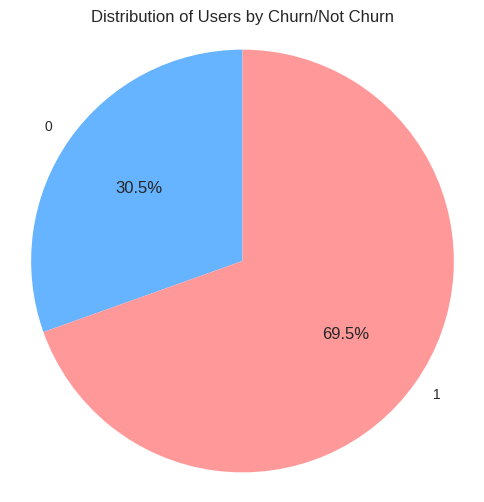

In [ ]:
import matplotlib.pyplot as plt

# Get the churn data
churn_users = df_mrg_users.groupby('Churn/Not_Churn')['user_id'].count().reset_index()

# Extract values and labels
labels = churn_users['Churn/Not_Churn']
sizes = churn_users['user_id']

# Plot with matplotlib
plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#ff9999'])
plt.title('Distribution of Users by Churn/Not Churn')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is a circle.
plt.show()

In [ ]:
df_mrg_users['Month_Year'] = df_mrg_users['last_spend_date'].dt.to_period('M')
masked = df_mrg_users[df_mrg_users['last_spend_date']!= '1900-01-01']

churn_users_month = masked.groupby(['Churn/Not_Churn','Month_Year'])['user_id'].count().reset_index()


churn_users_month = churn_users_month.sort_values(by="Month_Year", ascending=True).iloc[:,:]
churn_users_month.columns = ['Churn/Not_Churn','Transactions_Month_Year','# users']

churn_users_month['Transactions_Month_Year'] = churn_users_month['Transactions_Month_Year'].astype(str)

churn_users_month['Churn/Not_Churn'] = churn_users_month['Churn/Not_Churn'].astype(str)

fig = px.bar(churn_users_month, x="Transactions_Month_Year", y='# users',color = 'Churn/Not_Churn',
             color_discrete_map={
        '0': 'red',
        '1': 'blue'
    },title='Transactions Month & Year vs Number of Users based on Churn/Not_Churn')
fig.show()

In [ ]:
df_mrg_users.isnull().sum()

,0
user_id,0
birth_year,0
country,0
city,0
user_created_date,0
user_settings_crypto_unlocked,0
plan,0
num_contacts,0
num_referrals,0
num_successful_referrals,0


In [ ]:
df_mrg_users.set_index('user_id')

,birth_year,country,city,user_created_date,user_settings_crypto_unlocked,plan,num_contacts,num_referrals,num_successful_referrals,completed_transactions,total_spent,last_spend_date,days_since_last_spend,brand,user_age,age_segment,active_days,Churn/Not_Churn,Month_Year
user_id,,,,,,,,,,,,,,,,,,,
user_2811,1988,IE,C,2018-03-04 21:46:39.616834,0,STANDARD,0,0,0,57.0,9341.32,2018-05-20 07:45:36.948834,361.0,Apple,30,25-34,76,0,2018-05
user_4750,1987,FR,Ry,2018-04-07 06:49:18.345736,0,STANDARD,0,0,0,79.0,2343.19,2018-11-04 07:41:39.511736,193.0,Android,31,25-34,211,0,2018-11
user_17686,1984,GB,Ayr,2018-12-04 10:28:02.653147,0,PREMIUM,6,0,0,174.0,8562.77,2019-05-11 09:33:37.079147,5.0,Apple,34,25-34,157,1,2019-05
user_18779,1965,GB,Ayr,2018-12-31 07:42:19.353613,0,STANDARD,0,0,0,1.0,10.00,2018-12-31 07:46:58.524613,136.0,Apple,53,45-54,0,0,2018-12
user_7823,1999,PL,Buk,2018-06-07 03:22:40.590209,0,STANDARD,0,0,0,21.0,297.55,2019-02-04 05:57:30.760209,101.0,Apple,19,18-24,242,0,2019-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
user_10774,1971,LT,Stupuru kaimas Joniskio raj.,2018-08-10 09:38:41.171397,0,STANDARD,0,0,0,0.0,0.00,1900-01-01 00:00:00.000000,0.0,Android,47,45-54,-43321,1,1900-01
user_13408,1997,LT,"Akademijos mstl., Kauno rajonas",2018-10-12 17:22:00.181811,0,STANDARD,0,0,0,0.0,0.00,1900-01-01 00:00:00.000000,0.0,Android,21,18-24,-43384,1,1900-01
user_7913,1980,LT,"Sangrūdos km., Kalvarijos sav.",2018-06-23 21:32:52.835542,0,STANDARD,0,0,0,5.0,383.73,2018-07-10 00:15:37.621542,310.0,Android,38,35-44,16,0,2018-07


In [ ]:
# Group by 'country' and get the count of transactions
country_churn_count = df_mrg_users.groupby(['country','Churn/Not_Churn']).size().reset_index(name='transaction_count')

# Get the top 10 countries with the highest notification counts
#top_5_countries = country_notification_count.nlargest(10, 'transactions_count')

pivot_table = country_churn_count.pivot_table(
    index='country',
    columns='Churn/Not_Churn',
    values='transaction_count',
    aggfunc='sum', # Sum up counts in case of multiple rows,
    fill_value=0
)

pivot_table['Total Transactions'] = df_mrg_users['Churn/Not_Churn'].count()

# Calculate the churn percentage per transaction
pivot_table['Churn % per Transaction'] = (pivot_table[0] / pivot_table['Total Transactions']) * 100

# Sort by 'Churn Percentage per Transaction' in descending order
pivot_table= pivot_table.sort_values(by='Churn % per Transaction', ascending=False)

# Display the sorted pivot table with churn percentage per transaction
print(pivot_table)

Churn/Not_Churn     0     1  Total Transactions  Churn % per Transaction
country                                                                 
GB               2378  3937               19430                12.238806
FR                686  1424               19430                 3.530623
PL                653  1653               19430                 3.360782
ES                372   619               19430                 1.914565
PT                208   396               19430                 1.070510
IE                183  1031               19430                 0.941843
DE                152   294               19430                 0.782295
LT                138   508               19430                 0.710242
RO                136   960               19430                 0.699949
CH                124   319               19430                 0.638188
IT                 89   222               19430                 0.458055
CZ                 85   270               19430    

In [ ]:
fig = px.pie(pivot_table.reset_index(), values='Churn % per Transaction', names='country', title='churn % of Country')

fig.update_traces(textposition='inside', textinfo='label')
fig.show()



In [ ]:
# Group by 'country' and get the count of transactions
country_churn_count = df_mrg_users.groupby(['country','Churn/Not_Churn']).size().reset_index(name='transaction_count')

# Get the top 10 countries with the highest notification counts
#top_5_countries = country_notification_count.nlargest(10, 'transactions_count')

pivot_table = country_churn_count.pivot_table(
    index='country',
    columns='Churn/Not_Churn',
    values='transaction_count',
    aggfunc='sum', # Sum up counts in case of multiple rows,
    fill_value=0
)

#pivot_table['Total Transactions'] = df_mrg_users['Churn/Not_Churn'].count()

# Calculate the churn percentage per transaction
pivot_table['Churn % per Transaction'] = (pivot_table[0] / (pivot_table[0] + pivot_table[1])) * 100

# Sort by 'Churn Percentage per Transaction' in descending order
pivot_table= pivot_table.sort_values(by=0, ascending=False)

# Display the sorted pivot table with churn percentage per transaction
print(pivot_table)

Churn/Not_Churn     0     1  Churn % per Transaction
country                                             
GB               2378  3937                37.656374
FR                686  1424                32.511848
PL                653  1653                28.317433
ES                372   619                37.537841
PT                208   396                34.437086
IE                183  1031                15.074135
DE                152   294                34.080717
LT                138   508                21.362229
RO                136   960                12.408759
CH                124   319                27.990971
IT                 89   222                28.617363
CZ                 85   270                23.943662
GR                 83   135                38.073394
NL                 73   101                41.954023
HU                 62    95                39.490446
SE                 58    83                41.134752
MT                 52   496                 9.

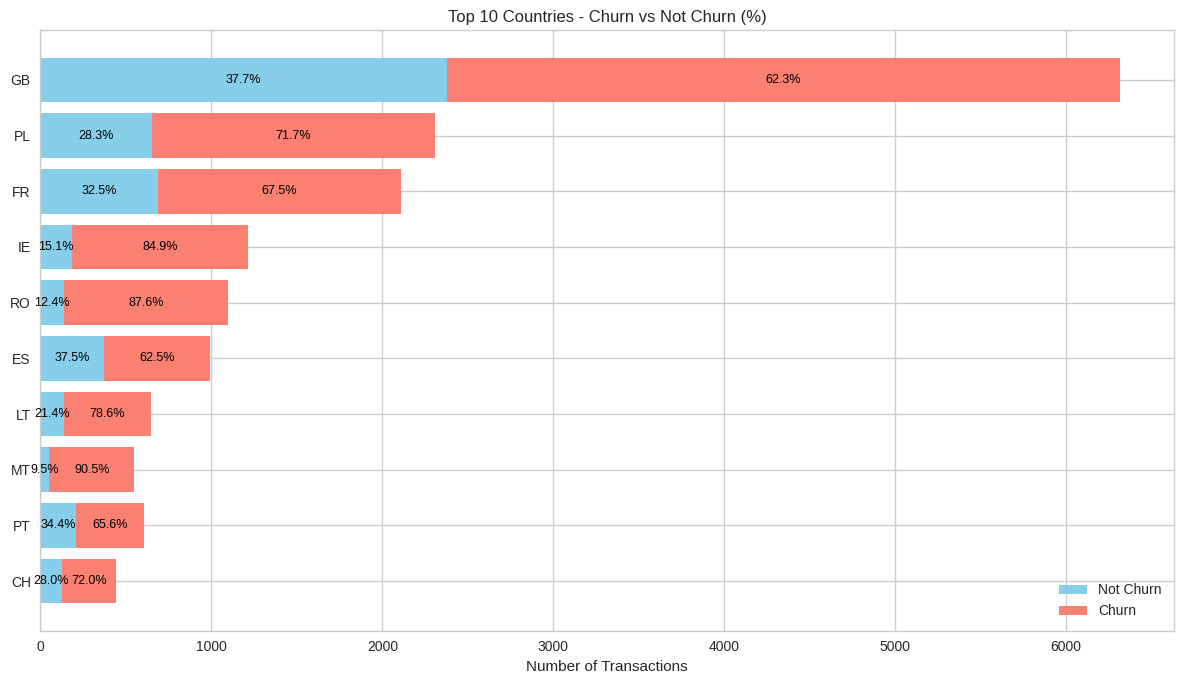

In [ ]:
import matplotlib.pyplot as plt

# İlk 10 ülkeyi al
top_10_countries = pivot_table.sort_values(by=1, ascending=False).head(10)

# Verileri hazırla
countries = top_10_countries.index
churn = top_10_countries[1]
not_churn = top_10_countries[0]
total = churn + not_churn

# Yüzdeleri hesapla
churn_percent = (churn / total * 100).round(1)
not_churn_percent = (not_churn / total * 100).round(1)

# Grafik çizimi
plt.figure(figsize=(12, 7))
bar1 = plt.barh(countries, not_churn, label='Not Churn', color='skyblue')
bar2 = plt.barh(countries, churn, left=not_churn, label='Churn', color='salmon')

# Yüzdelik yazılar
for i in range(len(countries)):
    plt.text(not_churn[i]/2, i, f'{not_churn_percent[i]}%', va='center', ha='center', fontsize=9, color='black')
    plt.text(not_churn[i] + churn[i]/2, i, f'{churn_percent[i]}%', va='center', ha='center', fontsize=9, color='black')

# Detaylar
plt.xlabel('Number of Transactions')
plt.title('Top 10 Countries - Churn vs Not Churn (%)')
plt.legend()
plt.gca().invert_yaxis()  # En büyük yukarıda

plt.tight_layout()
plt.show()

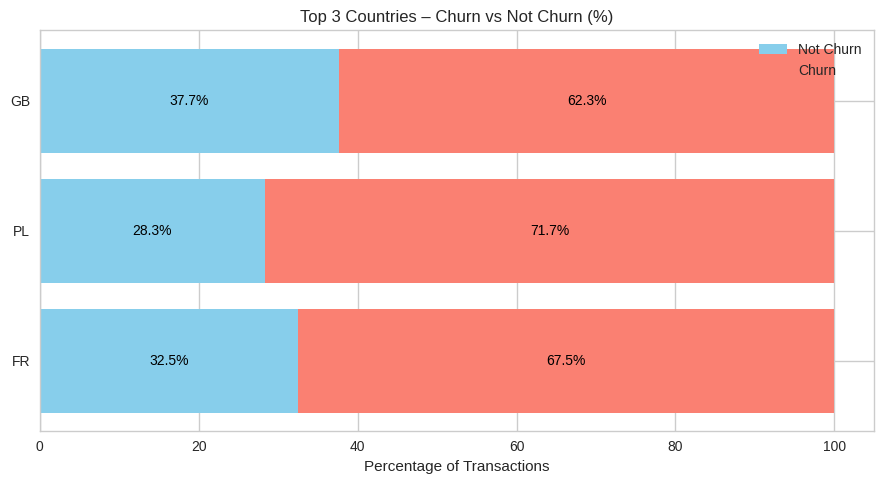

In [ ]:
import matplotlib.pyplot as plt

# İlk 3 ülkeyi seç
top_3_countries = pivot_table.sort_values(by=1, ascending=False).head(3)

# Yüzdelikleri hesapla
total = top_3_countries[0] + top_3_countries[1]
churn_percent = (top_3_countries[1] / total) * 100
not_churn_percent = (top_3_countries[0] / total) * 100

# Grafik çizimi
plt.figure(figsize=(9, 5))
bar1 = plt.barh(top_3_countries.index, not_churn_percent, color='skyblue', label='Not Churn')
bar2 = plt.barh(top_3_countries.index, churn_percent, left=not_churn_percent, color='salmon', label='Churn')

# Yüzdelik yazılar
for i, (nc, c) in enumerate(zip(not_churn_percent, churn_percent)):
    plt.text(nc / 2, i, f'{nc:.1f}%', va='center', ha='center', color='black', fontsize=10)
    plt.text(nc + c / 2, i, f'{c:.1f}%', va='center', ha='center', color='black', fontsize=10)

# Detaylar
plt.xlabel('Percentage of Transactions')
plt.title('Top 3 Countries – Churn vs Not Churn (%)')
plt.legend()
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [ ]:

fig = px.histogram(df_mrg_users, x="age_segment", color="Churn/Not_Churn",text_auto=True,title='Age distribution over ')

fig.show()

In [ ]:
# Group by 'age_segment' and get the count of transactions
age_segment_churn_count = df_mrg_users.groupby(['age_segment','Churn/Not_Churn']).size().reset_index(name='transaction_count')

# Get the top 10 countries with the highest notification counts
#top_5_countries = age_segment_notification_count.nlargest(10, 'transactions_count')

pivot_table = age_segment_churn_count.pivot_table(
    index='age_segment',
    columns='Churn/Not_Churn',
    values='transaction_count',
    aggfunc='sum', # Sum up counts in case of multiple rows,
    fill_value=0
)

#pivot_table['Total Transactions'] = df_mrg_users['Churn/Not_Churn'].count()

# Calculate the churn percentage per transaction
pivot_table['Churn % per Age'] = (pivot_table[0] / (pivot_table[0] + pivot_table[1])) * 100

# Sort by 'Churn Percentage per Transaction' in descending order
pivot_table= pivot_table.sort_values(by='Churn % per Age', ascending=False)

# Display the sorted pivot table with churn percentage per transaction
print(pivot_table)

Churn/Not_Churn     0     1  Churn % per Age
age_segment                                 
55-64             393   621        38.757396
65+               134   217        38.176638
45-54             695  1455        32.325581
35-44            1357  2892        31.936926
18-24            1093  2572        29.822647
25-34            2246  5755        28.071491


In [ ]:
fig = px.histogram(df_mrg_users, y="plan", color="Churn/Not_Churn",text_auto=True,title= 'Plan distribution over Churn/Not_Churn' )

fig.show()

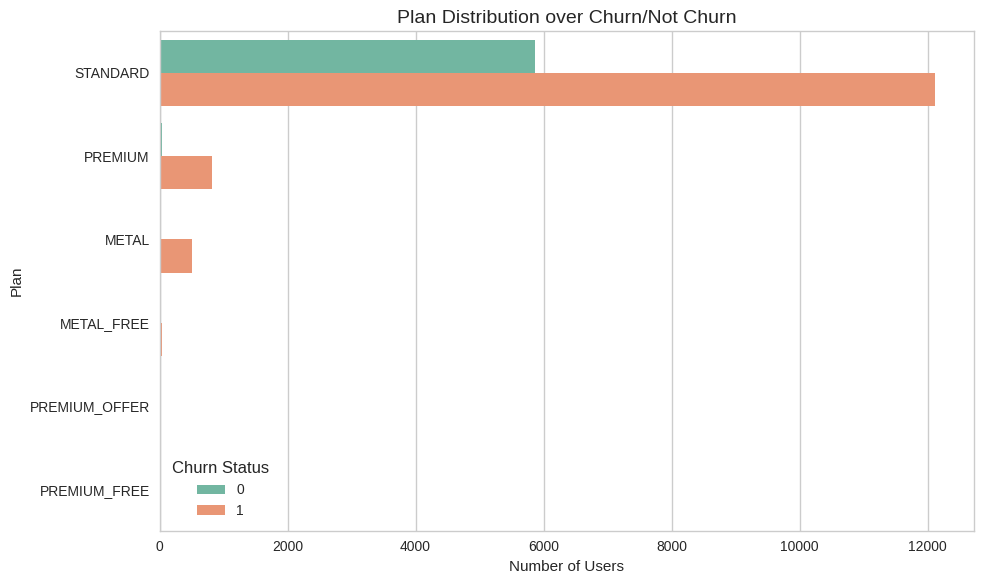

In [ ]:
  import matplotlib.pyplot as plt
import seaborn as sns

# Set the plot style
plt.style.use('seaborn-whitegrid')

# Create a countplot (bar chart) using Seaborn
plt.figure(figsize=(10,6))
sns.countplot(data=df_mrg_users, y='plan', hue='Churn/Not_Churn', palette='Set2')

# Add title and labels
plt.title('Plan Distribution over Churn/Not Churn', fontsize=14)
plt.xlabel('Number of Users')
plt.ylabel('Plan')
plt.legend(title='Churn Status')

plt.tight_layout()
plt.show()

In [ ]:
# Group by 'age_segement' and get the count of transactions
age_segment_churn_count = df_mrg_users.groupby(['age_segment','Churn/Not_Churn']).size().reset_index(name='transaction_count')

# Get the top 10 countries with the highest notification counts
#top_5_countries = plan_notification_count.nlargest(10, 'transactions_count')

pivot_table = age_segment_churn_count.pivot_table(
    index='age_segment',
    columns='Churn/Not_Churn',
    values='transaction_count',
    aggfunc='sum', # Sum up counts in case of multiple rows,
    fill_value=0
)

#pivot_table['Total Transactions'] = df_mrg_users['Churn/Not_Churn'].count()

# Calculate the churn percentage per transaction
pivot_table['Churn % per age_segement'] = (pivot_table[0] / (pivot_table[0] + pivot_table[1])) * 100

# Sort by 'Churn Percentage per Transaction' in descending order
pivot_table= pivot_table.sort_values(by='Churn % per age_segement', ascending=False)

# Display the sorted pivot table with churn percentage per transaction
print(pivot_table)

Churn/Not_Churn     0     1  Churn % per age_segement
age_segment                                          
55-64             393   621                 38.757396
65+               134   217                 38.176638
45-54             695  1455                 32.325581
35-44            1357  2892                 31.936926
18-24            1093  2572                 29.822647
25-34            2246  5755                 28.071491


In [ ]:
# Group by 'plan' and get the count of transactions
plan_churn_count = df_mrg_users.groupby(['plan','Churn/Not_Churn']).size().reset_index(name='transaction_count')

# Get the top 10 countries with the highest notification counts
#top_5_countries = plan_notification_count.nlargest(10, 'transactions_count')

pivot_table = plan_churn_count.pivot_table(
    index='plan',
    columns='Churn/Not_Churn',
    values='transaction_count',
    aggfunc='sum', # Sum up counts in case of multiple rows,
    fill_value=0
)

#pivot_table['Total Transactions'] = df_mrg_users['Churn/Not_Churn'].count()

# Calculate the churn percentage per transaction
pivot_table['Churn % per Plan'] = (pivot_table[0] / (pivot_table[0] + pivot_table[1])) * 100

# Sort by 'Churn Percentage per Transaction' in descending order
pivot_table= pivot_table.sort_values(by='Churn % per Plan', ascending=False)

# Display the sorted pivot table with churn percentage per transaction
print(pivot_table)

Churn/Not_Churn     0      1  Churn % per Plan
plan                                          
STANDARD         5872  12120         32.636727
PREMIUM            38    827          4.393064
PREMIUM_OFFER       1     24          4.000000
METAL               7    500          1.380671
METAL_FREE          0     37          0.000000
PREMIUM_FREE        0      4          0.000000


Let s check correlation between Churn /Not Churn column and numerical columns

In [ ]:
df_numeric = df_mrg_users.select_dtypes(include=['number'])

# Compute correlation matrix
corr_matrix = df_numeric.corr()

# Extract correlations with "Churn/Not_Churn"
churn_corr = corr_matrix['Churn/Not_Churn'].sort_values(ascending=False)

churn_corr

,Churn/Not_Churn
Churn/Not_Churn,1.000000
completed_transactions,0.281534
num_contacts,0.158001
total_spent,0.095850
user_settings_crypto_unlocked,0.094165
birth_year,0.053872
user_age,-0.053814
active_days,-0.137700
days_since_last_spend,-0.817957
num_referrals,NaN


In [ ]:
fig = px.imshow(corr_matrix, text_auto=True)
fig.show()

In [ ]:
df_mrg_users_new = df_mrg_users.drop(columns =['num_referrals','num_successful_referrals'])

Let s create sample data

In [ ]:
df_mrg_users_new[df_mrg_users_new['Churn/Not_Churn']==0].count()

,0
user_id,5918
birth_year,5918
country,5918
city,5918
user_created_date,5918
user_settings_crypto_unlocked,5918
plan,5918
num_contacts,5918
completed_transactions,5918
total_spent,5918


In [ ]:
df_mrg_users_new['users_id_new'] = df_mrg_users_new['user_id'].str.replace('user_', '', regex=True)

In [ ]:
df_mrg_users_new['users_id_new'] = df_mrg_users_new['users_id_new'].astype(int)

In [ ]:
df_mrg_users_new = df_mrg_users_new.drop(columns = 'user_id')

In [ ]:
# concatenate Churn/Not_Churn users and 5000 randomly selected wanted users
dataset = pd.concat([df_mrg_users_new[df_mrg_users_new['Churn/Not_Churn']==0].sample(5000),
                     df_mrg_users_new[df_mrg_users_new['Churn/Not_Churn']==1].sample(5000)])

dataset['Churn/Not_Churn'].value_counts()

,count
Churn/Not_Churn,
0,5000
1,5000


# Features determination

Let s check if there is any relation between amount_usd column and churn/not churn column.

*  First to understand data distribution (amount_usd) use Kolmogorov-Smirnov (KS) Test


KS test is a better choice for checking normality when dealing with larger samples.


In [ ]:
from scipy.stats import kstest

stat, p = kstest(dataset['total_spent'], 'norm', args=(dataset['total_spent'].mean(), dataset['total_spent'].std()))
print(f"Kolmogorov-Smirnov Test: Statistic={stat}, p-value={p}")

if p < 0.05:
    print("The data is NOT normally distributed.")
else:
    print("The data follows a normal distribution.")


Kolmogorov-Smirnov Test: Statistic=0.4302031054152934, p-value=0.0
The data is NOT normally distributed.




*   Second use the Mann-Whitney U Test to understand relationships




In [ ]:
from scipy.stats import mannwhitneyu

churn_group = dataset[dataset['Churn/Not_Churn'] == 0]['total_spent']
not_churn_group = dataset[dataset['Churn/Not_Churn'] == 1]['total_spent']

stat, p = mannwhitneyu(churn_group, not_churn_group, alternative='two-sided')
print(f"Mann-Whitney U Test: Statistic={stat}, p-value={p}")

if p < 0.05:
    print("There is a significant difference between Churn and Not Churn groups.")
else:
    print("No significant difference between Churn and Not Churn groups.")


Mann-Whitney U Test: Statistic=6238947.0, p-value=0.0
There is a significant difference between Churn and Not Churn groups.


In [ ]:
fig = px.box(dataset, x="Churn/Not_Churn", y="total_spent",
             title="Comparison of Churn vs. Not Churn",
             labels={"Churn/Not_Churn": "Churn Status", "total_spent": "Amount of USD"},
             color="Churn/Not_Churn")


fig.show()

Let s check relation between user_age and Churn/Not_Churn column




In [ ]:
fig = px.histogram(dataset, x="user_age", color='Churn/Not_Churn',
                   title="Age Distribution Based on Churn/Not Churn")
fig.show()

*   First to understand data distribution (user_age) use Kolmogorov-Smirnov (KS) Test

In [ ]:
from scipy.stats import kstest

stat, p = kstest(dataset['user_age'], 'norm', args=(dataset['user_age'].mean(), dataset['user_age'].std()))
print(f"Kolmogorov-Smirnov Test: Statistic={stat}, p-value={p}")

if p < 0.05:
    print("The data is NOT normally distributed.")
else:
    print("The data follows a normal distribution.")



TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

*   Second use the Mann-Whitney U Test to understand relationships

In [ ]:
from scipy.stats import mannwhitneyu

# Separate data into Churn and Not Churn groups
churn_age = dataset[dataset['Churn/Not_Churn'] == 1]['user_age']
not_churn_age = dataset[dataset['Churn/Not_Churn'] == 0]['user_age']

# Mann-Whitney U Test
stat, p = mannwhitneyu(churn_age, not_churn_age, alternative='two-sided')

print(f"Mann-Whitney U Test: Statistic={stat}, p-value={p}")

if p < 0.05:
    print("There is a significant difference in user age between Churn and Not Churn groups.")
else:
    print("No significant difference in user age between Churn and Not Churn groups.")

In [ ]:
dataset.isnull().sum()

,0
birth_year,0
country,0
city,0
user_created_date,0
user_settings_crypto_unlocked,0
plan,0
num_contacts,0
completed_transactions,0
total_spent,0
last_spend_date,0


Let s check if transaction_state has affect on Churn/Not_Churn by Chi-Square Test (for Categorical Variables)

Anova test for transactions_state (for Comparing Multiple Groups)

In [ ]:
dataset.set_index('users_id_new')

,birth_year,country,city,user_created_date,user_settings_crypto_unlocked,plan,num_contacts,completed_transactions,total_spent,last_spend_date,days_since_last_spend,brand,user_age,age_segment,active_days,Churn/Not_Churn,Month_Year
users_id_new,,,,,,,,,,,,,,,,,
8408,1964,FR,Paris,2018-07-18 01:40:22.683664,0,STANDARD,0,3.0,17.01,2018-07-18 02:06:04.500664,302.0,Android,54,45-54,0,0,2018-07
14889,1929,FR,Ajaccio,2018-10-30 23:09:16.308300,0,STANDARD,6,4.0,30.63,2018-11-02 02:09:18.743300,195.0,Android,89,65+,2,0,2018-11
9149,1990,GB,London,2018-07-26 10:57:06.685019,0,STANDARD,0,2.0,20.00,2018-08-06 21:36:45.265019,282.0,Android,28,25-34,11,0,2018-08
17357,1992,RO,Bucuresti,2018-12-18 16:57:24.634247,0,STANDARD,15,12.0,99.50,2019-01-31 11:17:42.453247,105.0,Android,26,25-34,43,0,2019-01
15071,1972,CH,Russikon,2018-10-16 20:51:39.134664,0,STANDARD,0,22.0,5642.71,2019-03-07 22:34:05.412664,69.0,Apple,46,45-54,142,0,2019-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17372,1986,MT,Gzira,2018-12-03 09:14:22.954987,0,STANDARD,40,218.0,7221.46,2019-05-07 00:11:00.739987,9.0,Apple,32,25-34,154,1,2019-05
6764,2000,GB,Windermere,2018-06-16 08:57:26.942531,0,STANDARD,0,107.0,3790.75,2019-05-02 06:47:02.277531,14.0,Apple,18,18-24,319,1,2019-05
19170,1992,GB,London,2018-12-23 12:40:04.830990,0,PREMIUM,0,308.0,8661.31,2019-05-12 23:10:29.246990,3.0,Android,26,25-34,140,1,2019-05


In [ ]:
dataset.columns

Index(['birth_year', 'country', 'city', 'user_created_date',
       'user_settings_crypto_unlocked', 'plan', 'num_contacts',
       'completed_transactions', 'total_spent', 'last_spend_date',
       'days_since_last_spend', 'brand', 'user_age', 'age_segment',
       'active_days', 'Churn/Not_Churn', 'Month_Year', 'users_id_new'],
      dtype='object')

In [ ]:
dataset.city.nunique()

3765

In [ ]:
dataset.country.nunique()

40

# Logistic Regression

Logistic Regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Split dataset into train and test sets while stratifying based on 'Churn/Not_Churn'
train, test = train_test_split(dataset, test_size=0.2, random_state=30)

test_users_ids = test.index

# Define features (X) and target (y)
X_train = train.drop(columns=['Churn/Not_Churn', 'last_spend_date', 'days_since_last_spend',
                              'active_days', 'user_created_date',
                              'Month_Year', 'country','city'])

X_test = test.drop(columns=['Churn/Not_Churn', 'last_spend_date', 'days_since_last_spend',
                              'active_days', 'user_created_date',
                              'Month_Year', 'country','city'])

y_train = train['Churn/Not_Churn']
y_test = test['Churn/Not_Churn']

In [ ]:
X_train.columns

Index(['birth_year', 'user_settings_crypto_unlocked', 'plan', 'num_contacts',
       'completed_transactions', 'total_spent', 'brand', 'user_age',
       'age_segment', 'users_id_new'],
      dtype='object')

Normalize for Categorical Data

In [ ]:
from sklearn.preprocessing import OneHotEncoder

X_train_cat = X_train.select_dtypes(exclude='number')
X_test_cat = X_test.select_dtypes(exclude='number')

# Instanciate One hot encoder
ohe = OneHotEncoder(sparse_output = False,handle_unknown='ignore',drop='if_binary').set_output(transform='pandas')

# fit on all the X set because some data could miss in the train and appear in the test
#X_cat = X.select_dtypes(exclude='number')
#ohe.fit(X_cat)

# transform train and test set
X_train_encoded = ohe.fit_transform(X_train_cat)
X_test_encoded = ohe.transform(X_test_cat)

In [ ]:
X_train_encoded.head()

,plan_METAL,plan_METAL_FREE,plan_PREMIUM,plan_PREMIUM_FREE,plan_PREMIUM_OFFER,plan_STANDARD,brand_Android,brand_Apple,brand_Unknown,age_segment_18-24,age_segment_25-34,age_segment_35-44,age_segment_45-54,age_segment_55-64,age_segment_65+
11881,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
15473,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
12394,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
14799,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
15461,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


Nomralize for Numerical Data

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().set_output(transform = 'pandas')

X_train_num = X_train.select_dtypes(include='number')
X_test_num = X_test.select_dtypes(include='number')

#fit data

X_train_scaled = scaler.fit_transform(X_train_num)
X_test_scaled = scaler.transform(X_test_num)


Recreate X

In [ ]:
X_train_processed = pd.concat([X_train_scaled,X_train_encoded],axis=1)
X_test_processed = pd.concat([X_test_scaled,X_test_encoded],axis=1)

Let s apply Logistic Regression model

In [ ]:
from sklearn.linear_model import LogisticRegression

# train model
clf = LogisticRegression()
clf.fit(X_train_processed, y_train)

# store predictions
y_pred = clf.predict(X_test_processed)

Calculate accuracy

In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
accuracy

0.764

In [ ]:
y_pro = clf.predict_proba(X_test_processed)
y_pro

array([[0.40238925, 0.59761075],
       [0.16812399, 0.83187601],
       [0.71601778, 0.28398222],
       ...,
       [0.54831674, 0.45168326],
       [0.59910452, 0.40089548],
       [0.6202127 , 0.3797873 ]])

In [ ]:
proba = pd.DataFrame(clf.predict_proba(X_test_processed), columns=["Churner", "Not churner"], index=test_users_ids)
proba

,Churner,Not churner
4502,0.402389,0.597611
12887,0.168124,0.831876
5082,0.716018,0.283982
14686,0.276174,0.723826
9525,0.129088,0.870912
...,...,...
3837,0.163657,0.836343
17620,0.549075,0.450925
17371,0.548317,0.451683
15797,0.599105,0.400895


Let s check confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

cm

array([[866, 127],
       [345, 662]])

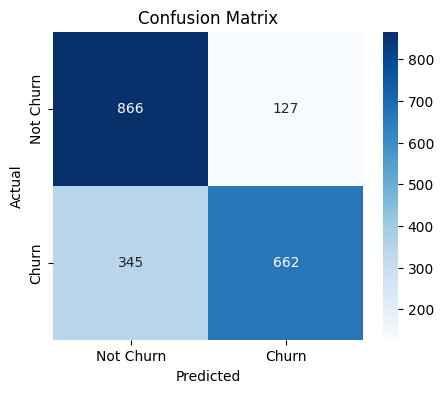

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm,annot=True, fmt='d', cmap='Blues', xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import recall_score

recall_score(y_test, y_pred)


0.6573982125124131

Let s check which feature has most impact in Logistic Regression

In [ ]:
feature_importance = pd.DataFrame({
    'Feature': X_train_processed.columns,
    'Coefficient': clf.coef_[0]
})

feature_importance

,Feature,Coefficient
0,birth_year,-0.045575
1,user_settings_crypto_unlocked,0.038228
2,num_contacts,0.622485
3,completed_transactions,2.996771
4,total_spent,0.372201
5,user_age,0.072272
6,users_id_new,0.337960
7,plan_METAL,0.470405
8,plan_METAL_FREE,0.465195
9,plan_PREMIUM,0.548794


In [ ]:
top_features = feature_importance.sort_values(by='Coefficient', ascending=False)

fig = px.bar(top_features, x='Coefficient', y='Feature', orientation='h',
             title="Features in Logistic Regression",
             color='Coefficient')
fig.show()

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100, random_state=30)
rf_clf.fit(X_train_processed, y_train)

RandomForestClassifier(random_state=30)

In [ ]:
y_pred_rf = rf_clf.predict(X_test_processed)

In [ ]:
# Compute accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Model Accuracy: {accuracy_rf:.2f}")


Random Forest Model Accuracy: 0.81


In [ ]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_rf

array([[794, 199],
       [183, 824]])

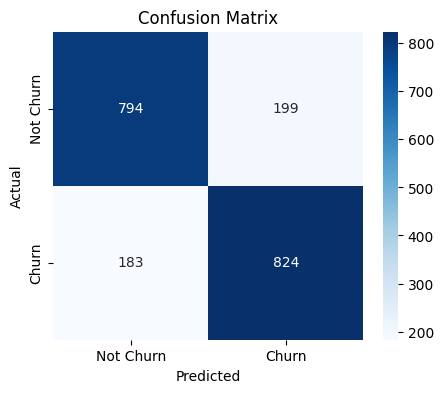

In [ ]:
# Plot confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_rf,annot=True, fmt='d', cmap='Blues', xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import recall_score

recall_score(y_test, y_pred_rf)

0.8182720953326713

Get feature importances

In [ ]:
feature_importance_rf = pd.DataFrame({
    'Feature': X_train_processed.columns,
    'Importance': rf_clf.feature_importances_
})

feature_importance_rf

,Feature,Importance
0,birth_year,5.921182e-02
1,user_settings_crypto_unlocked,1.019639e-02
2,num_contacts,1.258885e-01
3,completed_transactions,3.161173e-01
4,total_spent,2.371759e-01
5,user_age,5.922719e-02
6,users_id_new,1.332114e-01
7,plan_METAL,4.236595e-03
8,plan_METAL_FREE,5.601951e-05
9,plan_PREMIUM,6.095604e-03


In [ ]:
feature_importance_rf = feature_importance_rf.sort_values(by='Importance', ascending=False)


fig = px.bar(feature_importance_rf, x='Importance', y='Feature', orientation='h',
             title="Features in Random Forest Model",
             color='Importance')
fig.show()


# use the PyCaret library for understand which ML models are suitable the data.

In [ ]:
from pycaret.classification import setup

train = train.drop(columns=['last_spend_date', 'days_since_last_spend',
                              'active_days', 'user_created_date',
                              'Month_Year', 'country','city'])
test = test.drop(columns=['last_spend_date', 'days_since_last_spend',
                              'active_days', 'user_created_date',
                              'Month_Year', 'country','city'])


xp = setup(data = train,
           test_data = test,
           target = 'Churn/Not_Churn',
           normalize = True,
           session_id = 30
           )

,Description,Value
0,Session id,30
1,Target,Churn/Not_Churn
2,Target type,Binary
3,Original data shape,"(10000, 11)"
4,Transformed data shape,"(10000, 23)"
5,Transformed train set shape,"(8000, 23)"
6,Transformed test set shape,"(2000, 23)"
7,Numeric features,7
8,Categorical features,3
9,Preprocess,True


In [ ]:
from pycaret.classification import compare_models

best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8086,0.8932,0.7949,0.8169,0.8056,0.6172,0.6177,1.3060
lightgbm,Light Gradient Boosting Machine,0.8039,0.8885,0.7876,0.8138,0.8004,0.6077,0.6082,0.7730
ada,Ada Boost Classifier,0.8029,0.8889,0.8069,0.8001,0.8033,0.6058,0.6061,0.4360
rf,Random Forest Classifier,0.7944,0.8805,0.7814,0.8020,0.7913,0.5887,0.5892,1.1570
xgboost,Extreme Gradient Boosting,0.7874,0.8774,0.7786,0.7920,0.7851,0.5747,0.5750,0.2770
et,Extra Trees Classifier,0.7628,0.8414,0.7290,0.7813,0.7541,0.5254,0.5269,1.0320
lr,Logistic Regression,0.7537,0.8257,0.6361,0.8307,0.7200,0.5073,0.5220,0.9350
dt,Decision Tree Classifier,0.7363,0.7362,0.7293,0.7389,0.7339,0.4725,0.4728,0.1670
svm,SVM - Linear Kernel,0.7351,0.8022,0.6341,0.7969,0.7043,0.4700,0.4818,0.2630
ridge,Ridge Classifier,0.7110,0.7873,0.5304,0.8289,0.6465,0.4216,0.4519,0.1370


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

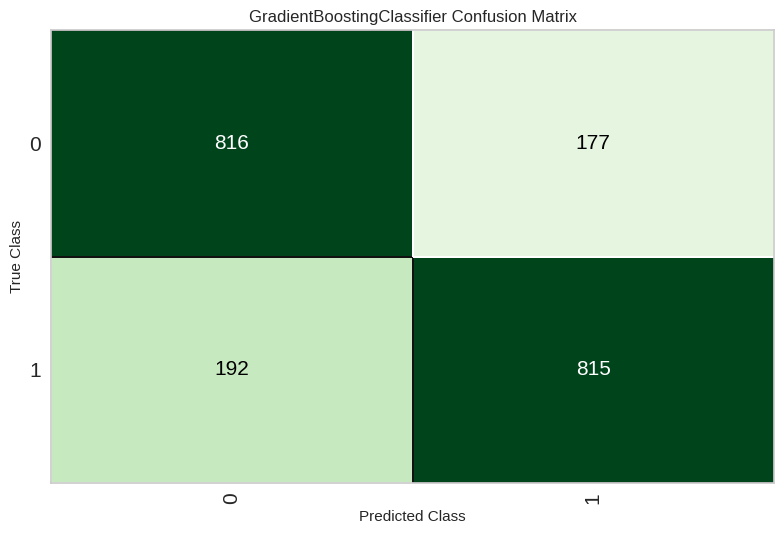

In [ ]:
from pycaret.classification import plot_model

plot_model(best_model,plot='confusion_matrix')

In [ ]:
from pycaret.classification import tune_model

best_model_tuned = tune_model(best_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8075,0.8850,0.8045,0.8086,0.8065,0.6150,0.6150
1,0.8200,0.9075,0.8045,0.8295,0.8168,0.6400,0.6403
2,0.7750,0.8714,0.7569,0.7844,0.7704,0.5500,0.5503
3,0.7925,0.8828,0.7619,0.8107,0.7855,0.5849,0.5860
4,0.8012,0.8881,0.8120,0.7941,0.8030,0.6025,0.6027
5,0.8038,0.8763,0.7845,0.8151,0.7995,0.6075,0.6079
6,0.8100,0.8965,0.8020,0.8142,0.8081,0.6200,0.6201
7,0.8012,0.8895,0.8100,0.7961,0.8030,0.6025,0.6026
8,0.8212,0.9035,0.8125,0.8270,0.8197,0.6425,0.6426


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


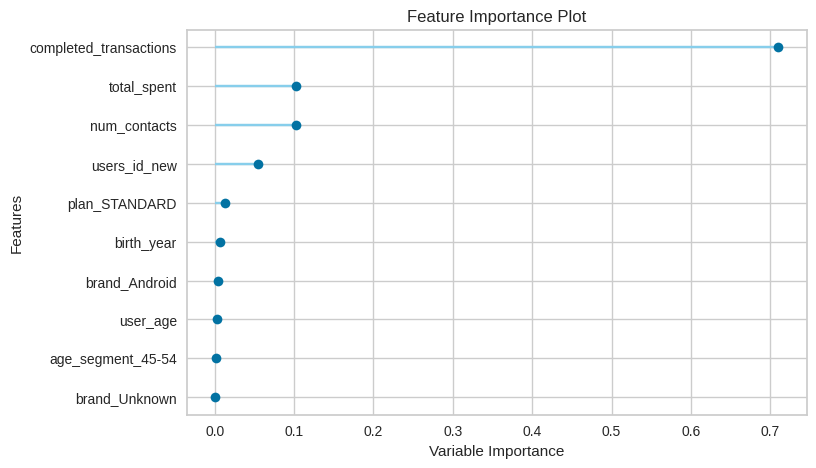

In [ ]:
plot_model(best_model,'feature')

# SMOTE for imbalanced data distrubition

In [ ]:
!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE
import numpy as np

# Split into features and target
X = df_mrg_users_new.drop(columns=['Churn/Not_Churn', 'last_spend_date', 'days_since_last_spend',
                              'active_days', 'user_created_date',
                              'Month_Year', 'country','city'])
y = df_mrg_users_new['Churn/Not_Churn']

# Identify columns with object (string) data type
categorical_cols = X.select_dtypes(include=['object']).columns

# Perform one-hot encoding on categorical columns
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')  # sparse=False for dense output

# Fit and transform the encoder on the categorical columns
encoded_data = encoder.fit_transform(X[categorical_cols])

# Create a DataFrame from the encoded data
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_cols), index=X.index)  # adding index to preserve original row indices

# Concatenate the encoded DataFrame with the numerical features
X_encoded = pd.concat([X.drop(categorical_cols, axis=1), encoded_df], axis=1)
X_encoded = X_encoded.astype(np.float64)  # Ensure all columns are numeric

# Apply SMOTE to the entire dataset
smote = SMOTE(random_state=30)
X_smote, y_smote = smote.fit_resample(X_encoded, y)


In [ ]:
print(f"Original X shape: {X.shape}")
print(f"Original y distribution: \n{y.value_counts()}")
print(f"Resampled X shape: {X_smote.shape}")
print(f"Resampled y distribution: \n{y_smote.value_counts()}")

Original X shape: (19430, 10)
Original y distribution: 
Churn/Not_Churn
1    13512
0     5918
Name: count, dtype: int64
Resampled X shape: (27024, 22)
Resampled y distribution: 
Churn/Not_Churn
0    13512
1    13512
Name: count, dtype: int64


In [ ]:
# Split the smote data into train and test sets (80% train, 20% test)
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(
    X_smote, y_smote, test_size=0.2, random_state=30, stratify=y_smote
)


Logistic Regression for SMOTE model

In [ ]:

# Initialize the logistic regression model
log_reg = LogisticRegression(random_state=30)

# Train the model on the smote data
log_reg.fit(X_train_smote, y_train_smote)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=30, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predict on the test set
y_pred_smote = log_reg.predict(X_test_smote)

# Evaluate the model's performance
print("Accuracy:", accuracy_score(y_test_smote, y_pred_smote))
print("\nClassification Report:\n", classification_report(y_test_smote, y_pred_smote))
print("\nConfusion Matrix:\n", confusion_matrix(y_test_smote, y_pred_smote))


Accuracy: 0.7509713228492136

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.86      0.78      2702
           1       0.82      0.64      0.72      2703

    accuracy                           0.75      5405
   macro avg       0.76      0.75      0.75      5405
weighted avg       0.76      0.75      0.75      5405


Confusion Matrix:
 [[2322  380]
 [ 966 1737]]


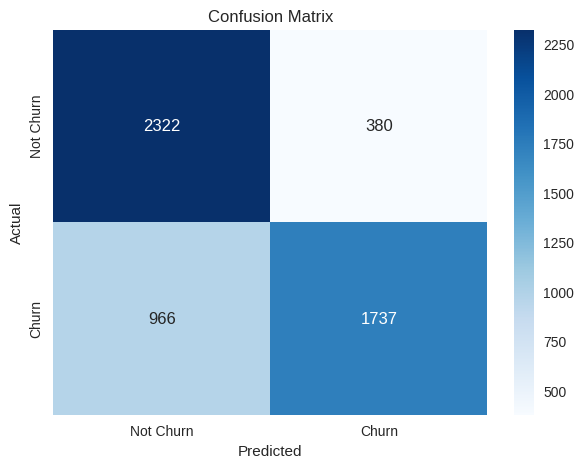

In [ ]:
# Generate the confusion matrix
cm = confusion_matrix(y_test_smote, y_pred_smote)

# Plot the confusion matrix
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
recall = recall_score(y_test_smote, y_pred_smote)

print(f"Recall: {recall:.4f}")

Recall: 0.6426


In [ ]:

feature_importance = pd.DataFrame({
    'Feature': X_train_smote.columns,
    'Coefficient': log_reg.coef_[0]
})

feature_importance

,Feature,Coefficient
0,birth_year,-0.000972
1,user_settings_crypto_unlocked,0.003931
2,num_contacts,0.019806
3,completed_transactions,0.014631
4,total_spent,0.000016
5,user_age,0.003440
6,users_id_new,0.000067
7,plan_METAL,0.001054
8,plan_METAL_FREE,0.000094
9,plan_PREMIUM,0.003860


In [ ]:
top_features = feature_importance.sort_values(by='Coefficient', ascending=False)

fig = px.bar(top_features, x='Coefficient', y='Feature', orientation='h',
             title="Features in Logistic Regression",
             color='Coefficient')
fig.show()

Random Forest for SMOTE model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Train the Random Forest model
rf_clf = RandomForestClassifier(random_state=30)
rf_clf.fit(X_train_smote, y_train_smote)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=None,
                       oob_score=False, random_state=30, verbose=0,
                       warm_start=False)

In [ ]:
y_pred_smote_rf = rf_clf.predict(X_test_smote)

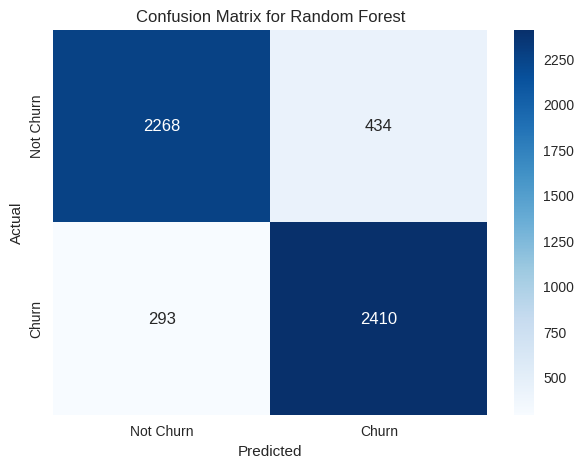

In [ ]:
cm = confusion_matrix(y_test_smote, y_pred_smote_rf)

# Plot the confusion matrix
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
accuracy = accuracy_score(y_test_smote, y_pred_smote_rf)


# Display accuracy
print(f"Accuracy: {accuracy}")

Accuracy: 0.8654949121184089


In [ ]:
recall = recall_score(y_test_smote, y_pred_smote_rf)

# Display recall score
print(f"Recall Score: {recall}")

Recall Score: 0.8916019237883833


In [ ]:
# Evaluate the model's performance
print("Accuracy:", accuracy_score(y_test_smote, y_pred_smote_rf))
print("\nClassification Report:\n", classification_report(y_test_smote, y_pred_smote_rf))
#print("\nConfusion Matrix:\n", confusion_matrix(y_test_smote, y_pred_smote_rf))


Accuracy: 0.8654949121184089

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.84      0.86      2702
           1       0.85      0.89      0.87      2703

    accuracy                           0.87      5405
   macro avg       0.87      0.87      0.87      5405
weighted avg       0.87      0.87      0.87      5405



In [ ]:
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd

# Accuracy
print("Accuracy:", accuracy_score(y_test_smote, y_pred_smote_rf))

# Classification Report as a DataFrame
report_dict = classification_report(y_test_smote, y_pred_smote_rf, output_dict=True)
report_df = pd.DataFrame(report_dict).transpose()

# Display the table
print("\nClassification Report (as DataFrame):")
print(report_df)

Accuracy: 0.8654949121184089

Classification Report (as DataFrame):
              precision    recall  f1-score      support
0              0.885592  0.839378  0.861866  2702.000000
1              0.847398  0.891602  0.868938  2703.000000
accuracy       0.865495  0.865495  0.865495     0.865495
macro avg      0.866495  0.865490  0.865402  5405.000000
weighted avg   0.866491  0.865495  0.865403  5405.000000


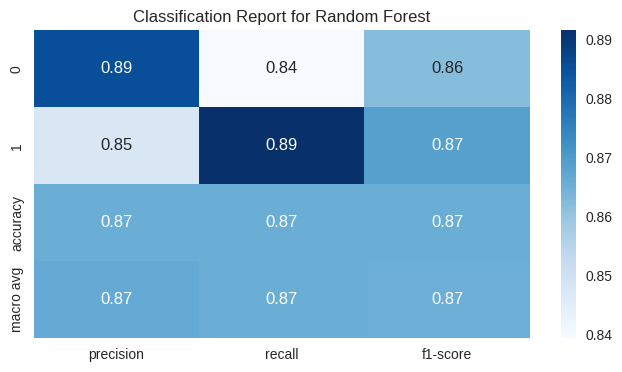

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap="Blues", fmt=".2f")  # skip 'accuracy' row for heatmap
plt.title("Classification Report for Random Forest")
plt.show()


In [ ]:
feature_importance_rf = rf_clf.feature_importances_

feature_importance_rf

array([5.05573082e-02, 2.81144880e-02, 1.05410987e-01, 2.63875378e-01,
       2.01847811e-01, 4.95246359e-02, 1.06283487e-01, 1.83761728e-03,
       2.02421462e-05, 4.81114161e-03, 5.25608570e-06, 6.24193606e-05,
       1.63945181e-02, 3.90984305e-02, 4.25405471e-02, 6.05043579e-04,
       1.80614495e-02, 3.63399641e-02, 1.81493633e-02, 1.09323019e-02,
       3.94640650e-03, 1.58120343e-03])

In [ ]:
# Create a DataFrame with feature names and their importance scores
feature_importance_rf_df = pd.DataFrame({
    'Feature': X_smote.columns,  # Feature names
    'Importance': feature_importance_rf  # Importance values
})

# Sort the features by importance score
feature_importance_rf_df = feature_importance_rf_df.sort_values(by='Importance', ascending=False)

In [ ]:
fig = px.bar(feature_importance_rf_df, x='Importance', y='Feature', orientation='h',
             title="Features in Random Forest",
             color='Importance')
fig.show()

# Suggestions

Churn/Not Churn Suggestions
Target High-Risk Users: Use the model to identify users likely to churn and re-engage them with offers or reminders.

Personalized Retention: Send tailored emails, discounts, or loyalty rewards to at-risk users.

Time-Based Triggers: Take action (e.g., send a reminder) if no activity is detected within a certain period (e.g., 30 days).

Behavioral Insights: Analyze patterns—like low spending or short activity periods—to adjust marketing or UX strategies.

Team Recommendations:

Marketing: Segment users based on churn risk for better targeting.

Product: Improve onboarding or user experience to reduce early churn.